In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#df = pd.read_csv("/content/drive/MyDrive/all_out.csv")
#df = pd.read_csv("/content/drive/MyDrive/all_102924.csv")
df = pd.read_csv("/content/drive/MyDrive/all_folds.csv")
df = pd.read_csv("/content/drive/MyDrive/multid.csv")

In [ ]:
df

,Unnamed: 0,Subj.,Date,Level,Fold,Type_Trial,Trial #,Sampling Freq,Dominant Freq. of Mvmt.,Acceleration with max-P.,...,Var. in WSTDs,Average WRs,Average Acc.,Total Acceleration,Skew,Kurtosis,Mean % Change Between Adjacent Peaks,Mean Squared Jerk,Max Jerk,Scaled Mean Squared Jerk
0,0,1,120224,1,1,bkbrush,1,98,0.715328,-0.026569,...,0.027256,0.184301,-0.040525,-0.252180,0.058773,1.544624,34.670911,0.000207,0.090569,0.002287
1,1,1,120224,1,2,bkbrush,1,98,0.286131,-0.032376,...,0.017053,0.127792,-0.026059,-0.161838,0.274189,0.943111,128.373972,0.000312,0.086826,0.003596
2,2,1,120224,1,3,bkbrush,1,98,0.572263,0.006183,...,0.012611,0.133159,-0.019644,-0.121720,-0.528704,0.264382,0.213157,0.000157,0.055932,0.002804
3,3,1,120224,1,4,bkbrush,1,98,0.143066,-0.026066,...,0.017956,0.214732,0.008307,-0.047911,0.686788,0.251198,16.860683,0.000788,0.140632,0.005600
4,4,1,120224,1,5,bkbrush,1,98,0.143066,0.106596,...,0.012967,0.089600,0.112174,0.669802,0.125266,0.524953,-1.625593,0.000084,0.051146,0.001650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,81,2,120224,1,26,bkbrush,1,98,0.143066,0.292634,...,0.004711,0.079513,0.288582,1.761235,-0.413393,0.864178,0.000000,0.000098,0.042538,0.002297
82,82,2,120224,1,27,bkbrush,1,98,0.143066,0.205640,...,0.004720,0.073734,0.214233,1.252114,0.447357,-0.132982,0.256789,0.000066,0.037091,0.001777
83,83,2,120224,1,28,bkbrush,1,98,1.859854,0.267935,...,0.004783,0.060076,0.270597,1.626343,0.248409,-0.141903,0.266482,0.000047,0.023262,0.002019
84,84,2,120224,1,29,bkbrush,1,98,2.289051,0.271963,...,0.004224,0.073948,0.279908,1.696290,0.201916,0.499167,-0.310018,0.000098,0.035513,0.002751


In [ ]:
#all brushing trisas
#df_brush = df[df['bk'] != 2]
df_brush = df[df['Type_Trial'].str.contains("brush", case=False, na=False)]
df_comb = df[df['Type_Trial'].str.contains("comb", case=False, na=False)]d

In [ ]:
df_comb

,Unnamed: 0,Subj.,Date,Type_Trial,Trial #,fold,bk,Dominant Freq. of Mvmt.,Acceleration with max-P.,Mean of PDF.,...,Var. in WSTDs,Average WRs,Average Acc.,Total Acceleration,Skew,Kurtosis,Mean % Change Between Adjacent Peaks,Mean Squared Jerk,Max Jerk,Scaled Mean Squared Jerk
749,749,aa,100724,bkcomb,1.0,1,1,8.440876,-0.023828,0.001179,...,0.020553,0.996159,0.001359,-0.043002,0.510748,0.578778,1.608204,0.016252,0.550322,0.029533
750,750,aa,100724,bkcomb,1.0,2,1,6.867153,-0.061614,0.019083,...,0.057785,1.086056,0.019745,0.143959,0.687178,0.367838,2.394184,0.015307,0.587762,0.026042
751,751,aa,100724,bkcomb,1.0,3,1,6.867153,-0.006746,0.003452,...,0.052315,0.876733,0.003572,0.025743,0.425903,0.578888,2.280184,0.009253,0.416175,0.022233
752,752,aa,100724,bkcomb,1.0,4,1,7.582482,-0.016919,0.052223,...,0.084546,1.298495,0.052565,0.295698,0.621331,0.813794,6.092270,0.022900,0.607464,0.037698
753,753,aa,100724,bkcomb,1.0,5,1,2.002920,-0.031409,0.019856,...,0.038075,1.118398,0.020356,0.165789,0.836967,1.328022,1.919753,0.011016,0.450655,0.024444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153,1153,cz,102824,normlongcomb,1.0,5,0,2.002920,0.023777,0.046512,...,0.178096,1.590910,0.045926,0.171585,1.607147,4.832141,8.676385,0.025114,1.037231,0.024212
1154,1154,cz,102824,normlongcomb,1.0,6,0,1.859854,0.027338,0.106087,...,0.144246,1.881880,0.107782,0.557134,1.481497,2.856910,0.546608,0.015658,0.815255,0.019206
1155,1155,cz,102824,normlongcomb,1.0,7,0,0.858394,0.083649,0.103772,...,0.053971,1.601546,0.103062,0.689777,0.100262,0.346331,-0.738712,0.014875,0.664298,0.022392
1156,1156,cz,102824,normlongcomb,1.0,8,0,2.145985,0.062198,0.125143,...,0.118426,1.769151,0.126816,0.757155,1.115901,2.631374,1.271854,0.018291,0.769750,0.023763


In [ ]:
#df_brush.columns
df_brush

,Unnamed: 0,Subj.,Date,Type_Trial,Trial #,fold,bk,Dominant Freq. of Mvmt.,Acceleration with max-P.,Mean of PDF.,...,Var. in WSTDs,Average WRs,Average Acc.,Total Acceleration,Skew,Kurtosis,Mean % Change Between Adjacent Peaks,Mean Squared Jerk,Max Jerk,Scaled Mean Squared Jerk
0,0,aa,91524,normbrush,1.0,1,0,4.148905,-0.013336,0.120266,...,0.029636,0.854005,0.119696,0.672833,0.650287,-0.386370,0.498878,0.007948,0.342711,0.023193
1,1,aa,91524,normbrush,1.0,2,0,4.148905,-0.015542,0.114703,...,0.022719,1.016240,0.114756,0.648606,0.427308,-0.057128,-1.292655,0.014804,0.807162,0.018341
2,2,aa,91524,normbrush,1.0,3,0,3.147445,0.068505,0.140212,...,0.041965,1.079434,0.138701,0.774567,0.127977,-0.360321,-0.411297,0.012546,0.502621,0.024962
3,3,aa,91524,normbrush,1.0,4,0,9.013139,0.199292,0.179649,...,0.049036,0.799139,0.179211,1.017912,-0.086724,0.352205,5.921837,0.014739,0.506575,0.029096
4,4,aa,91524,normbrush,1.0,5,0,8.727007,0.215541,0.213595,...,0.055872,1.419189,0.214381,1.382032,0.121883,0.025821,1.600377,0.036846,0.632571,0.058248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,744,vv,91624,bkbrush,5.0,6,1,4.005839,-0.009154,-0.003878,...,0.006169,0.246959,-0.003524,-0.015936,0.177210,0.104974,-0.037599,0.000545,0.107421,0.005075
745,745,vv,91624,bkbrush,5.0,7,1,2.861314,0.003332,0.008745,...,0.015162,0.480097,0.008767,0.045088,0.758620,4.292963,4.720499,0.001845,0.292752,0.006301
746,746,vv,91624,bkbrush,5.0,8,1,3.433577,0.000123,0.013753,...,0.029904,0.448786,0.013705,0.074205,0.352655,4.729933,-0.043718,0.002782,0.414056,0.006720
747,747,vv,91624,bkbrush,5.0,9,1,5.150365,0.005871,0.000185,...,0.011466,0.292459,0.000297,0.007219,-0.016758,0.595012,7.230936,0.001026,0.184158,0.005571


In [ ]:
#X = df.iloc[:,[4, 10, 12, 13, 14]]
#X = df_brush.loc[:, ["Acceleration with max-P.", "Mean of PDF.", "Variance of PDF", "Average Acc.", "Total Acceleration", "Skew", "Kurtosis", "Scaled Mean Squared Jerk", "Max Jerk"]]
#X = df_brush.loc[:, ['Dominant Freq. of Mvmt.', 'Acceleration with max-P.', 'Mean of PDF.',
#       'Variance of PDF', 'Var. in WMs', 'Mean of WSTDs', 'Var. in WSTDs',
#      'Average WRs', 'Average Acc.', 'Total Acceleration', 'Skew', 'Kurtosis',
#      'Mean % Change Between Adjacent Peaks', 'Mean Squared Jerk', 'Max Jerk',
#    'Scaled Mean Squared Jerk']]
X = df_brush.loc[:, ["Mean of PDF.", "Variance of PDF", "Total Acceleration", "Kurtosis", "Scaled Mean Squared Jerk"]]
#X = df_comb.loc[:, ["Mean of PDF.", "Variance of PDF", "Total Acceleration", "Kurtosis", "Scaled Mean Squared Jerk"]]




In [ ]:
y = df_brush.loc[:,["bk"]]
#y = df_comb.loc[:,["bk"]]

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size = 0.3, random_state = 20, stratify =y)

#standardize data (u = 0, s = 1)
#scale = StandardScaler()
#Xtr = scale.fit_transform(Xtr)
#Xte = scale.transform(Xte)

## Logistic Regression

Accuracy:  0.6919431279620853
Confusion Matrix:  [[141   2]
 [ 63   5]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: >

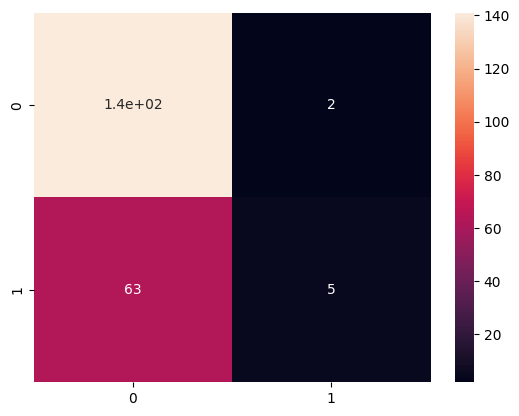

In [ ]:

log = LogisticRegression()
log.fit(Xtr, ytr)

ypr = log.predict(Xte)
print("Accuracy: ", accuracy_score(yte, ypr))
print("Confusion Matrix: ", confusion_matrix(yte, ypr))
sns.heatmap(confusion_matrix(yte, ypr), annot = True)

In [ ]:
y_probs =log.predict_proba(Xte)[:, 1]

In [ ]:
fpr, tpr, thresholds = roc_curve(yte, y_probs)
roc_auc = auc(fpr, tpr)


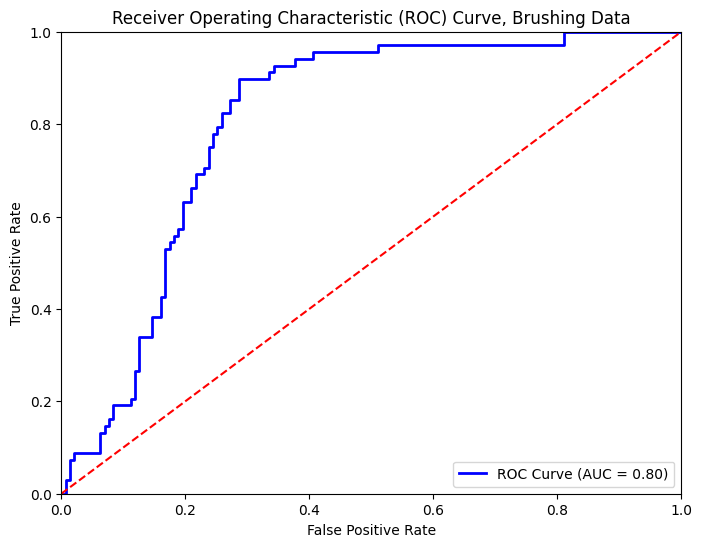

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guess
plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve, Brushing Data')
plt.legend(loc='lower right')

In [ ]:
coefs = log.coef_[0]

<BarContainer object of 5 artists>

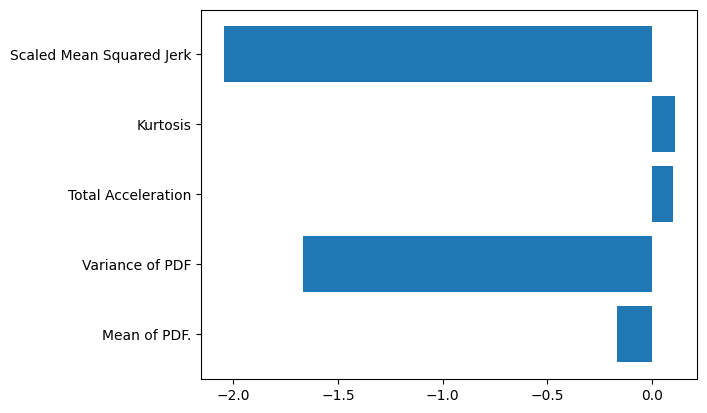

In [ ]:
plt.barh(X.columns, coefs)

## PCA

In [ ]:
ss = StandardScaler()
X_scale = ss.fit_transform(X)

In [ ]:
pca = PCA(n_components = 2)
pca.fit(X_scale)

PCA(n_components=2)

In [ ]:
trans = pca.transform(X_scale)
#y = df_brush.loc[:,["bk"]]
color = df_brush.loc[:,["Subj."]]
color

,Subj.
0,aa
1,aa
2,aa
3,aa
4,aa
...,...
744,vv
745,vv
746,vv
747,vv


In [ ]:
for i in y:
  print(i)

bk


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0      aa
1      aa
2      aa
3      aa
4      aa
       ..
744    vv
745    vv
746    vv
747    vv
748    vv
Name: Subj., Length: 702, dtype: object

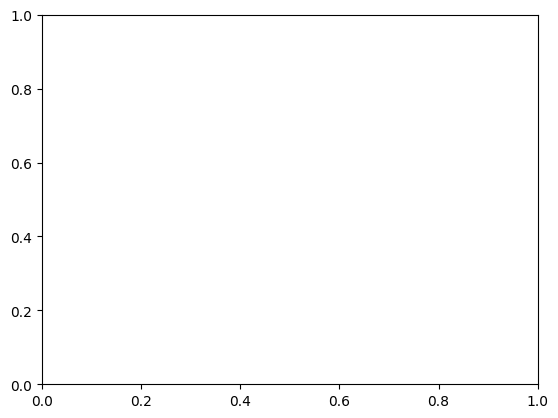

In [ ]:
plt.scatter(trans[:, 0], trans[:, 1], c = color["Subj."], cmap='viridis', alpha = 0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Plot of Norm/BK data")
plt.legend()

## K Nearest Neighbors

In [ ]:
knn_class = KNeighborsClassifier(n_neighbors = 5)
knn_class.fit(Xtr, ytr)
y_pred = knn_class.predict(Xte)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
acc = (yte == y_pred).sum() / len(y_pred)
print(acc)

ValueError: Unable to coerce to Series, length must be 1: given 211

In [ ]:
print(classification_report(yte, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       143
           1       0.74      0.79      0.77        68

    accuracy                           0.84       211
   macro avg       0.82      0.83      0.82       211
weighted avg       0.85      0.84      0.84       211



## Fake Data

Text(0, 0.5, 'Variance of Acceleration Distribution (g^2)')

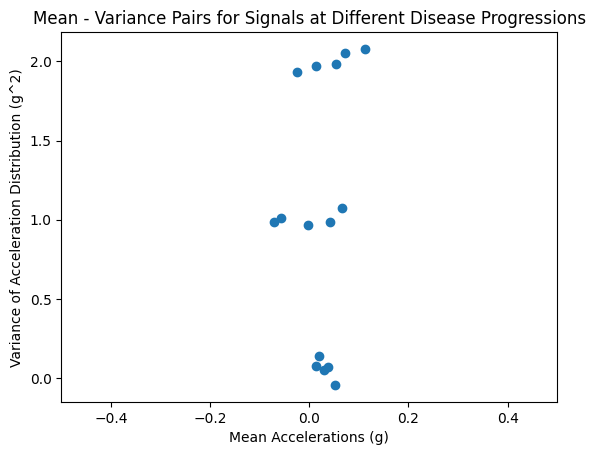

In [ ]:
x = np.zeros(15)
y1 = np.zeros(5) #diff variance centers
y2 = np.zeros(5) + 1
y3 = np.zeros(5) + 2

#noise
e_x = np.random.normal(0, 0.05, 15)
e_y = np.random.normal(0, 0.05, 15)

#x's
x = x + e_x
y = np.hstack((y1, y2, y3)) + e_y
plt.scatter(x, y)
plt.xlim(-0.5, 0.5)
plt.title("Mean - Variance Pairs for Signals at Different Disease Progressions")
plt.xlabel("Mean Accelerations (g)")
plt.ylabel("Variance of Acceleration Distribution (g^2)")